<a href="https://colab.research.google.com/github/xoberoncs/xoberoncs/blob/main/Exerc%C3%ADcio_cr%C3%A9dito_e_censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação das bibliotecas**


In [ ]:
!pip install plotly --upgrade          #biblioteca de geração de gráficos dinâmicos +atualização

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 8.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import pandas as pd                  # permite o carregamento de arquivos .csv (base de dados)
import numpy as np                   # torna o manipulamento de vetores mais prático
import seaborn as sns                # visualização de gráficos
import matplotlib.pyplot as plt      # visualização de gráficos
import plotly.express as px          # geração de gráficos

# **Importação da base de dados**
Base adaptada de: https://www.kaggle.com/laotse/credit-risk-dataset

In [ ]:
base_credito = pd.read_csv('/content/credit_data.csv')

In [ ]:
base_credito

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


Na base temos como atributos: 
1. **clientid:** O ID de cada cliente. Variável categórica nominal
2. **income:** A renda anual de cada cliente. Variável numérica contínua.
3. **age:** A idade de cada cliente. Variável numérica contínua (nessa base)
4. **loan:** A dívida de cada cliente, Variável numérica contínua.
5. **default:** Se o cliente pagou (0) ou não (1) o empréstimo que realizou. Variável numérica discreta.










In [ ]:
base_credito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


# **Primeira visualização dos dados**

In [ ]:
np.unique(base_credito['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

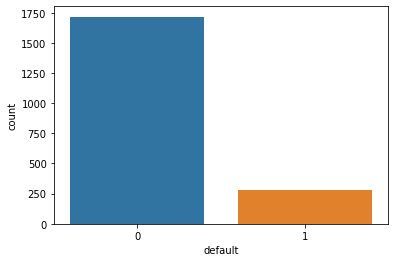

In [ ]:
sns.countplot(x = base_credito['default']);

Gráfico comparativo de pagantes (0) e não pagantes (1)

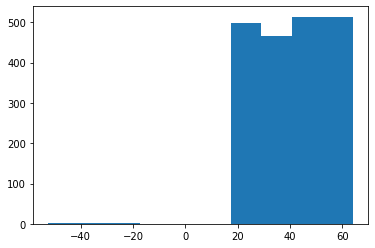

In [ ]:
plt.hist(x = base_credito['age']);

Gráfico mostrando a distribuição da idade dos clientes (idades negativas serão tratadas depois)

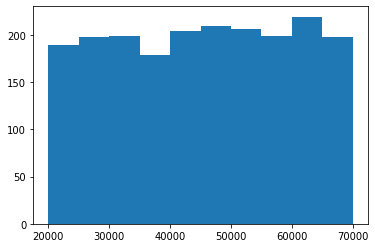

In [ ]:
plt.hist(x = base_credito['income']);

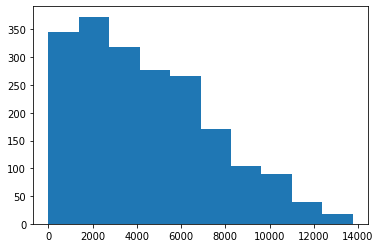

In [ ]:
plt.hist(x = base_credito['loan']);

In [ ]:
grafico = px.scatter_matrix(base_credito, dimensions=['age', 'income', 'loan'], color = 'default')


In [ ]:
grafico.show()

# **Tratamento dos valores inconsistentes**
Nesta etapa farei a correção dos valores incoerentes na base, neste caso, das idades negativas que não fazem sentido e influenciariam no treinamento do modelo.
Entre algumas maneiras conhecidas de se realizar esse procedimento, acabei optando por inserir o valor médio das idades dos clientes (desconsiderando os valores negativos).
Outra boa opção seria atualizar manualmente a base, já que são poucos (3) clientes com idades negativas, mas não tenho acesso neste exercício à esses clientes. 

In [ ]:
base_credito['age'][base_credito['age'] > 0].mean()                              # média das idades sem os valores negativos

40.92770044906149

In [ ]:
base_credito.loc[base_credito['age'] < 0, 'age'] = 40.92770044906149             # atribuindo a média aos valores negativos

Mesmo procedimento para valores não preenchidos na base.

In [ ]:
base_credito.isnull().sum()                                                      # identificando quantos valores não foram preenchidos em 
                                                                                 # cada atributo da base

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credito.loc[pd.isnull(base_credito['age'])]                                 # identificando os 3 clientes com a idade não preenchida        

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
base_credito['age'].fillna(base_credito['age'].mean(), inplace = True)           # substituindo os valores não preenchidos pela nova média de idades

# **Divisão entre previsores e classe**
Precisamos separar as variáveis previsoras (que serão utilizadas para prever determinado acontecimento, que neste caso é se o cliente vai pagar sua dívida ou não (0 e 1), das variáveis classe, que é o comportamento registrado dos clientes nesta base.

In [ ]:
X_credito = base_credito.iloc[:, 1:4].values                                     # atribuindo as variáveis previsoras (colunas 1, 2 e 3/income, age, loan para todas as linhas/clientes) à variável X_credito, 
                                                                                 # convertendo para o formato numpy (com o comando .values)

In [ ]:
X_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
Y_credito = base_credito.iloc[:, 4].values                                       # atribuindo a variável classe (coluna 4/default) à variável Y_credito

In [ ]:
Y_credito

array([0, 0, 0, ..., 1, 0, 0])

# **Escalonamento dos valores**
Aqui colocaremos os atributos da base em escala aproximada com a intenção de que o algoritmo não interprete importâncias diferentes entre os atributos, já que originalmente suas escalas são muito diferentes.

In [ ]:
from sklearn.preprocessing import StandardScaler                                 # Existem principalmente dois métodos de se aproximar a escala dos valores, 
escala_credito = StandardScaler()                                                # neste caso escolhemos a padronização.
X_credito = escala_credito.fit_transform(X_credito)

# **Base de dados do censo**
Fonte: https://archive.ics.uci.edu/ml/datasets/adult

In [ ]:
base_censo = pd.read_csv('/content/census.csv')

In [ ]:
base_censo

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
base_censo.isnull().sum()                                                         #verificando se existem valores faltantes na tabela

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# **Visualização dos dados**

In [ ]:
np.unique(base_censo['income'], return_counts=True)                              #fazendo a contagem da quantidade de cada atributo income

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

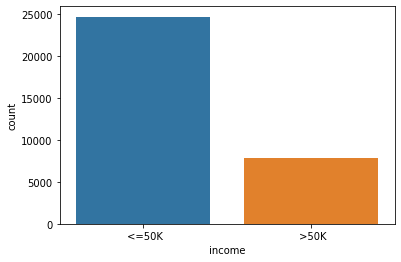

In [ ]:
sns.countplot(x = base_censo['income']);                                         #fazendo um gráfico para visualização dessas quantidades

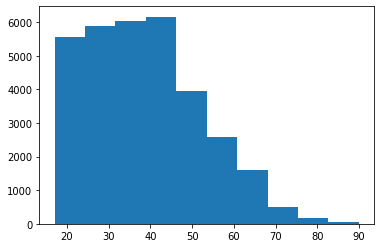

In [ ]:
plt.hist(x = base_censo['age']);                                                 #histograma para as idades

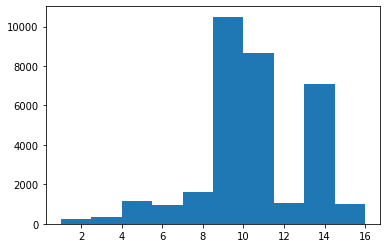

In [ ]:
plt.hist(x = base_censo['education-num']);

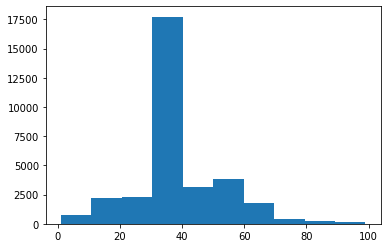

In [ ]:
plt.hist(base_censo['hour-per-week']);

In [ ]:
grafico = px.treemap(base_censo, path=['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(base_censo, path=['occupation', 'relationship', 'age'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_censo, dimensions=['education', 'income'])
grafico.show()

# **Divisão entre previsores e classe**

In [ ]:
X_censo = base_censo.iloc[:, 0:14].values

In [ ]:
X_censo

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
Y_censo = base_censo.iloc[:, 14].values                                         #lembrando que o .values é pra converter o formato para numpy

In [ ]:
Y_censo

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# **Tratamento dos atributos categóricos**
Para que o modelo consiga entender e utilizar os atributos categóricos nos cálculos, vamos convertê-los em números utilizando o método **LabelEncoder**, presente na biblioteca sklearn.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_censo[0]                                                                      # Aqui conseguimos identificar visualmente quais são os atributos categóricos:
                                                                                # Workclass, Education, Marital, Occupation, Relationship, Race, Sex, Country                                       

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_censo[:,1] = label_encoder_workclass.fit_transform(X_censo[:,1])              # Aqui alteramos todas as linhas de todos os atributos categóricos por números
X_censo[:,3] = label_encoder_education.fit_transform(X_censo[:,3])
X_censo[:,5] = label_encoder_marital.fit_transform(X_censo[:,5])
X_censo[:,6] = label_encoder_occupation.fit_transform(X_censo[:,6])
X_censo[:,7] = label_encoder_relationship.fit_transform(X_censo[:,7])
X_censo[:,8] = label_encoder_race.fit_transform(X_censo[:,8])
X_censo[:,9] = label_encoder_sex.fit_transform(X_censo[:,9])
X_censo[:,13] = label_encoder_country.fit_transform(X_censo[:,13])

# **Agora utilizaremos um método complementar ao anterior, chamado OneHotEncoder**

Após a implementação do LabelEncoder(), os atributos categórios se tornaram números. Para que durante os cálculos o modelo não considere que um número maior tenha mais relevância que um menor, é necessário utilizar este método



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_censo = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
X_censo = onehotencoder_censo.fit_transform(X_censo).toarray()

In [ ]:
X_censo

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

# **Escalonamento dos valores**
Agora colocaremos todos os valores da tabela dentro da mesma escala
Escolhemos a padronização que considera a média e o desvio padrão.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_censo = StandardScaler()
X_censo = scaler_censo.fit_transform(X_censo)

In [ ]:
X_censo

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

# **Divisão das bases em treinamento e teste**
Agora dividiremos a base em duas.
A primeira servirá de treinamento para o nosso modelo e a segunda testará sua efetividade em exemplos reais cujas classificações já sabemos.

In [ ]:
from sklearn.model_selection import train_test_split

# **Aplicação para a base do Crédito**

In [ ]:
X_credito_treinamento, X_credito_teste, Y_credito_treinamento, Y_credito_teste = train_test_split(X_credito, Y_credito, test_size = 0.25, random_state = 0)

In [ ]:
X_credito_treinamento.shape

(1500, 3)

In [ ]:
Y_credito_treinamento.shape

(1500,)

# **Aplicação para a base do Censo**

In [ ]:
X_censo_treinamento, X_censo_teste, Y_censo_treinamento, Y_censo_teste = train_test_split(X_censo, Y_censo, test_size= 0.15, random_state= 0)

In [ ]:
X_censo_treinamento.shape, Y_censo_treinamento.shape

((27676, 108), (27676,))

# **Salvando as variáveis no disco**

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credito_treinamento, Y_credito_treinamento, X_credito_teste, Y_credito_teste] ,f)

In [ ]:
with open('censo.pkl', mode = 'wb') as f:
  pickle.dump([X_censo_treinamento, Y_censo_treinamento, X_censo_teste, Y_censo_teste] ,f)

# **Aprendizagem Bayesiana - Naïve bayes**
Abordagem probabilística (Teorema de Bayes)

Aplicações boas:
*   Filtros de Spam
*   Mineração de emoções
*   Separação de documentos (assuntos)

Analisa uma base de dados histórica e gera uma outra tabela de probabilidades para cada classificação

Depois fazemos o cálculo das estimativas de onde cada cliente seria classificado com maior probabilidade

Podemos realizar a correção laplaciana (adicionar quantos registros forem necessários para que não hajam multiplicações por zero na tabela, geralmente acontece com bases de dados pequenas)

Probabilidades apriori e posteriori

Vantagens:

*   Rápido/pouco gasto computacional
*   Simplicidade de interpretação
*   Trabalha com altas dimensões (muitos atributos)
*   Boas previsões em bases pequenas (200, 300)

Desvantagens:

*   Não considera possíveis relações entre os atributos, cada atributo é independente, o que nem sempre é verdade












# **Naïve bayes - base risco de crédito**

In [ ]:
from sklearn.naive_bayes import GaussianNB                                       #GaussianNB utilizado para problemas mais genéricos                 

In [ ]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')                   #importando a base

In [ ]:
base_risco_credito                                                               #visualizando a base                                     

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values                         # separando os previsores

In [ ]:
Y_risco_credito = base_risco_credito.iloc[:, 4].values                           # separando a classe

In [ ]:
X_risco_credito, Y_risco_credito                                                 # visualizando

(array([['ruim', 'alta', 'nenhuma', '0_15'],
        ['desconhecida', 'alta', 'nenhuma', '15_35'],
        ['desconhecida', 'baixa', 'nenhuma', '15_35'],
        ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
        ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
        ['desconhecida', 'baixa', 'adequada', 'acima_35'],
        ['ruim', 'baixa', 'nenhuma', '0_15'],
        ['ruim', 'baixa', 'adequada', 'acima_35'],
        ['boa', 'baixa', 'nenhuma', 'acima_35'],
        ['boa', 'alta', 'adequada', 'acima_35'],
        ['boa', 'alta', 'nenhuma', '0_15'],
        ['boa', 'alta', 'nenhuma', '15_35'],
        ['boa', 'alta', 'nenhuma', 'acima_35'],
        ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [ ]:
from sklearn.preprocessing import LabelEncoder                                   # convertendo as variáveis categóricas em numéricas
label_encoder_historia = LabelEncoder()                                          # instanciando-nas em LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])  #substituindo as colunas com os valores numéricos
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:, 2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle                                                                    # salvando a nova base
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, Y_risco_credito] ,f)

In [ ]:
naive_risco_credito = GaussianNB()                                               #criando a tabela de probabilidades com Gaussiana
naive_risco_credito.fit(X_risco_credito, Y_risco_credito)

GaussianNB()

In [ ]:
# Como exemplo utilizaremos:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
# associação feita manualmente

previsao_RC = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])                   # previsao desses clientes do exemplo

In [ ]:
previsao_RC                                                                        # Para visualizar a tabela de probabilidades o R seria indicado

array(['baixo', 'moderado'], dtype='<U8')

# **Naïve bayes - base crédito**

In [ ]:
import pickle
with open('/content/credit.pkl', 'rb') as f:
  X_credito_treinamento, Y_credito_treinamento, X_credito_teste, Y_credito_teste = pickle.load(f)

In [ ]:
X_credito_treinamento.shape, Y_credito_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credito_teste.shape, Y_credito_teste.shape

((500, 3), (500,))

In [ ]:
naive_credito = GaussianNB()
naive_credito.fit(X_credito_treinamento, Y_credito_treinamento)


GaussianNB()

In [ ]:
previsao_C = naive_credito.predict(X_credito_teste)

In [ ]:
previsao_C            

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
Y_credito_teste                                                                 # Comparando a tabela de probabilidades que o algortimo fez com a tabela_teste que já tinhamos
                                                                                # Podemos encontrar alguns erros nos clientes que não pagam, o que é um erro que trará prejuízo
                                                                                # Para a empresa

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report                     # No caso o sklearn possui uma função que faz essa comparação automáticamente

In [ ]:
accuracy_score(Y_credito_teste, previsao_C)

0.938

In [ ]:
confusion_matrix(Y_credito_teste, previsao_C)                                    # Matriz de confusão, tabela SIM/NÃO x SIM/NÃO

array([[428,   8],
       [ 23,  41]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

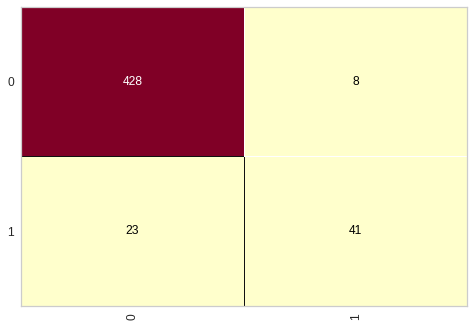

In [ ]:
cm = ConfusionMatrix(naive_credito)                                              # Configurando e plotando 
cm.fit(X_credito_treinamento, Y_credito_treinamento)
cm.score(X_credito_teste, Y_credito_teste)

In [ ]:
print(classification_report(Y_credito_teste, previsao_C))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



***Naïve bayes – base censo***

In [ ]:
with open('censo.pkl', 'rb') as f:
  X_census_treinamento, Y_censo_treinamento, X_censo_teste, Y_censo_teste = pickle.load(f)

In [ ]:
X_censo_treinamento.shape, Y_censo_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_censo_teste.shape, Y_censo_teste.shape

((4885, 108), (4885,))

In [ ]:
naive_censo = GaussianNB()
naive_censo.fit(X_censo_treinamento, Y_censo_treinamento)
previsoes_Censo = naive_censo.predict(X_censo_teste)
previsoes_Censo

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
Y_censo_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(Y_censo_teste, previsoes_Censo)                                  # Foi um péssimo algoritmo, já que jogar uma moeda teria 50% de chance de acerto

0.4767656090071648

0.4767656090071648

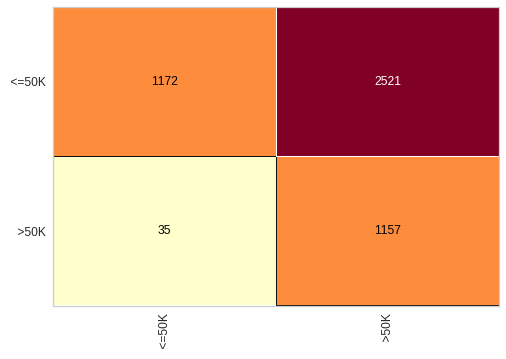

In [ ]:
cm = ConfusionMatrix(naive_censo)
cm.fit(X_censo_treinamento, Y_censo_teste)
cm.score(X_censo_teste, Y_censo_teste)

In [ ]:
print(classification_report(Y_censo_teste, previsoes_Censo))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# **Árvores de decisão**

Lembrete:
Cálculo de Entropia

Cálculo de Ganho de informação

Decide qual atributo tem mais importância em relação aos outros e vai criando nós com condições sobre cada atributo

Cria caminhos de decisão para se chegar na classe

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

# **Base risco de crédito**

In [ ]:
with open('risco_credito.pkl', 'rb') as f:                 # Importanto a base de dados pronta (já pré-processada) e fazendo a leitura 'rb' com o pickle
  X_risco_credito, Y_risco_credito = pickle.load(f)

In [ ]:

X_risco_credito                                                  # Visualizando os previsores

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
Y_risco_credito                                         # Visualizando a classe

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy', random_state = 0)                  # Criando a árvore de decisão / random_state = 0, sempre gerará os mesmos resultados
arvore_risco_credito.fit(X_risco_credito, Y_risco_credito)                                       # Encaixando os dados no algoritmo, a árvore de decisão será gerada fazendo-se os cálculos em cima dos dados da base importada 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
arvore_risco_credito.feature_importances_                                         # Verificando a escala de importância de cada um dos atributos Previsores

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

[Text(0.5, 0.9, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.2, 0.7, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(0.3, 0.5, 'história <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4, 0.3, 'dívida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.8, 0.7, 'história <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(0.7, 0.5, 'história <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]\nclass = baixo'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = baixo'),
 Text

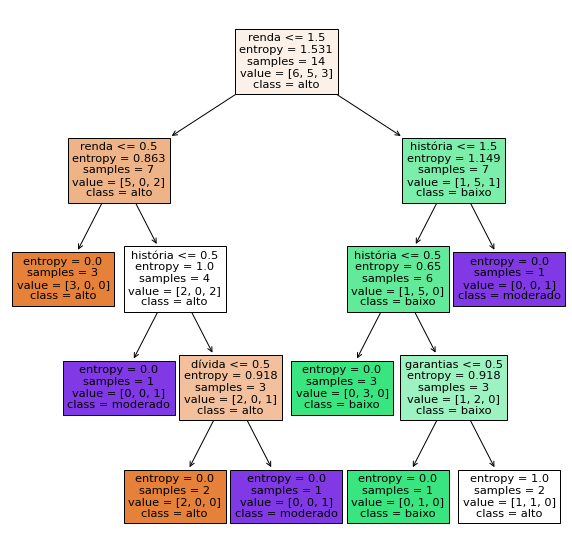

In [ ]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda'] 
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))                       # Dando nome aos previsores para passarmos como parâmetro no 'feature_names'               
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True)                        # Plotando a árvore e adicionando outras funcionalidades

In [ ]:
# Se quisermos adicionar mais registros ao algoritmo:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

# **Base Crédito**

In [ ]:
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credito_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

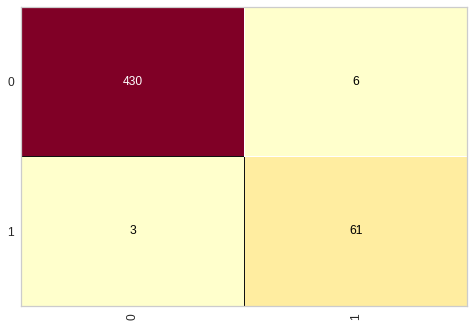

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

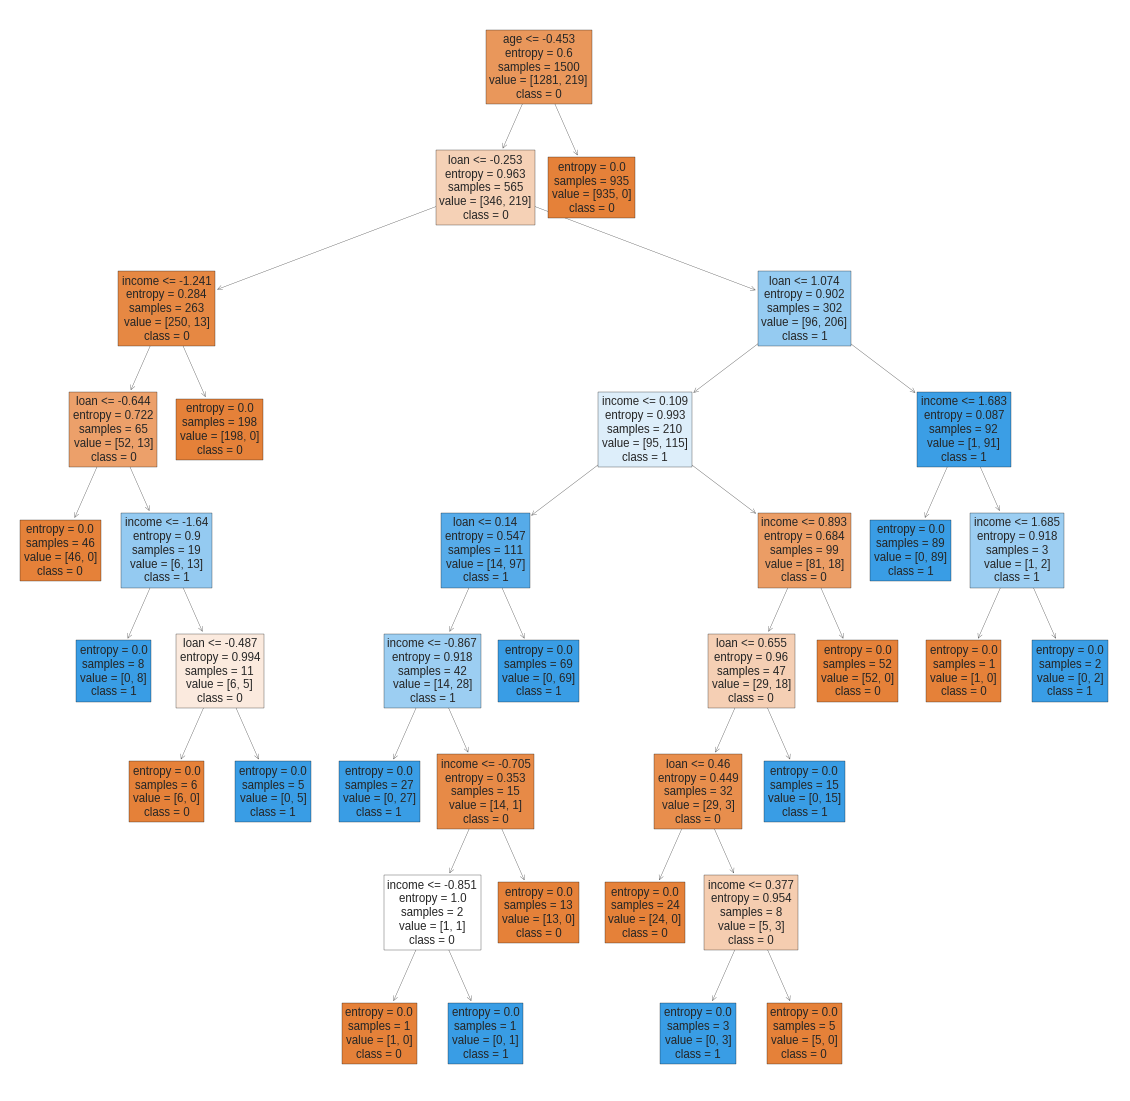

In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

# **Base Censo**

In [ ]:
with open('/content/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)


In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

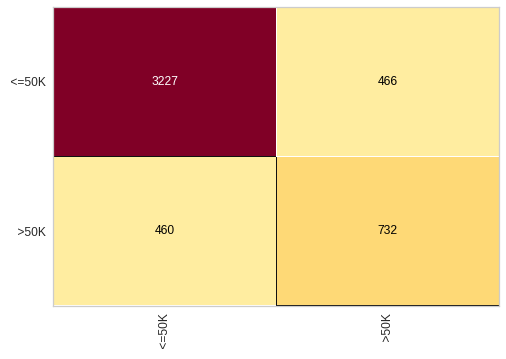

In [ ]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# **Random forest (floresta randômica)**
Uma melhoria da Árvore de Decisão

São utilizadas várias árvores (floresta)

-**Ensemble** learning:

multidisciplinariedade 

vários algoritmos juntos para formar um mais forte

em regressão (valores reais) se utiliza a média das respostas das árvores / em classificação (categorias) se usa a moda para se obter a resposta final

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# **Base crédito**

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape                   # 1500 registros com 3 atributos para treino

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape            # 500 registros para testar

((500, 3), (500,))

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
previsoes = random_forest_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

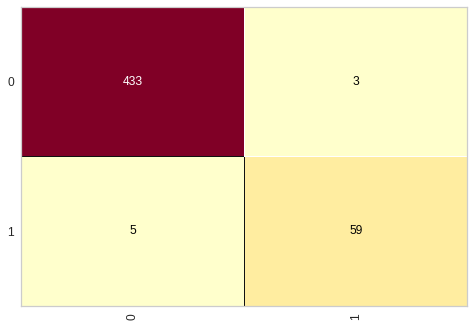

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



# **Base Censo**
Mesmo procedimento

In [ ]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
y_census_treinamento

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

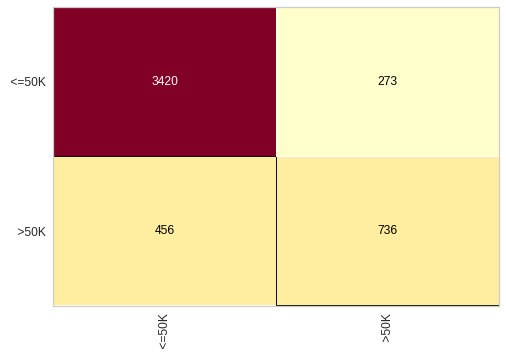

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

